# Astrodinámica para Ingeniería Aeroespacial
## Profesor Jorge I. Zuluaga

## Clase 4 - Problema de Lambert (parte 2)
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/notas-astrodyn/blob/main/Clase-04-astrodyn-problema_lambert_2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requerimientos

In [3]:
import sys
if 'pymcel' not in sys.modules:
    print("Installing PyMCEL")
    !pip3 install -Uq pymcel

Installing PyMCEL
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 34.1 MB/s eta 0:00:00


## Rutinas y constantes requeridas

In [4]:
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spy
from matplotlib.patches import Circle
grados = np.pi/180
radianes = 1/grados

def dibuja_conica(ax,e=0.5,p=1,w=0):

    # Convertimos el argumento del periapsis a radianes
    w = w*grados

    # Calculamos los puntos en el sistema natural de la cónica
    phi = np.pi if e<1 else 0.99*np.arccos(-1/e)
    fs = np.linspace(-phi, phi, 1000)
    rs = p/(1+e*np.cos(fs))
    xps = rs*np.cos(fs)
    yps = rs*np.sin(fs)
    zps = np.zeros_like(xps)

    # ROtamos los puntos
    R = spy.rotate(-w, 3)
    xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

    # Graficamos
    ax.plot(xs, ys)

def lambert_geometrico(P1,P2,a,plot=False):
  # Distancias
  r1 = np.linalg.norm(P1)
  r2 = np.linalg.norm(P2)

  # Posición de los focos vacantes
  try:
    Fsx,Fsy,Ftx,Fty = pc.intersecta_circunferencias(P1[0],P1[1],2*a-r1,P2[0],P2[1],2*a-r2)
  except:
    return None

  # Vectores dirigidos a los focos vacantes
  Fsvec = np.array([Fsx,Fsy,0])
  Ftvec = np.array([Ftx,Fty,0])

  # Dependiendo de la distancia determina el nombre
  if np.linalg.norm(Ftvec) < np.linalg.norm(Fsvec):
    Fsvec,Ftvec = Ftvec,Fsvec

  # Dirección de los vectores de excentricidad
  ehats = -Fsvec/np.linalg.norm(Fsvec)
  ehatt = -Ftvec/np.linalg.norm(Ftvec)

  # Argumento del periapsis
  ws = np.arctan2(ehats[1],ehats[0])
  wt = np.arctan2(ehatt[1],ehatt[0])

  # Excentricidades de las órbitas calculadas
  es = np.linalg.norm(Fsvec)/(2*a)
  et = np.linalg.norm(Ftvec)/(2*a)

  # Semiejes mayores
  ps = a*(1-es**2)
  pt = a*(1-et**2)

  # Dibuja solución
  if plot:
    print(f"Argumento del periapsis de los focos vacantes:",ws*radianes,wt*radianes)
    print(f"Excentricidades de las elipses encontradas:",es,et)
    print(f"Semilatus recti de las elipses encontradas:",ps,pt)

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)

    # Dibuja circunferencias
    c1 = Circle(P1,radius=2*a-r1,color='r',fill=False,ls='--',alpha=0.2)
    ax.add_patch(c1)

    c2 = Circle(P2,radius=2*a-r2,color='b',fill=False,ls='--',alpha=0.2)
    ax.add_patch(c2)

    # Dibuja posición de los focos vacantes encontrados
    ax.plot(0,0,'kx',ms=10)
    ax.text(0,0,'F')

    ax.plot(Fsvec[0],Fsvec[1],'ko')
    ax.text(Fsvec[0],Fsvec[1],r'$F_*$',color='k')

    ax.plot(Ftvec[0],Ftvec[1],'ko')
    ax.text(Ftvec[0],Ftvec[1],r'$\tilde F_{*}$',color='k')

    # Dibuja las cónicas
    dibuja_conica(ax,es,ps,ws*radianes)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

    dibuja_conica(ax,et,pt,wt*radianes)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

    ax.axis('equal')
    ax.grid()

  return r1, r2, ehats, ehatt, es, et, ps, pt, ws, wt

Paquete pymcel cargado. Versión: 0.6.5


## Solución geométrica

Argumento del periapsis de los focos vacantes: -125.29331765605177 -125.97162222707215
Excentricidades de las elipses encontradas: 0.44434674188850204 0.46135271836113145
Semilatus recti de las elipses encontradas: 0.7432731443238629 0.7290085707668976


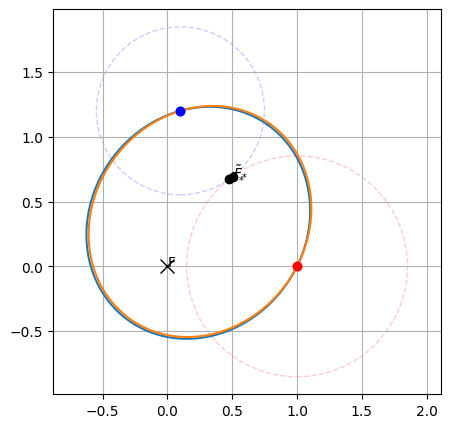

In [5]:
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
a = 1.0001*0.9260398644698074

r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt = lambert_geometrico(P1,P2,a,plot=True)

Órbita de mínimo semieje mayor:

In [6]:
cvec = P2 - P1
c = np.linalg.norm(cvec)
am = (r1 + r2 + c)/4
am

0.9260398644698074

Órbita de mínima excentricidad:

In [7]:
es = (r2 - r1)/c
es

0.13610630525281975

In [8]:
ps = r1 - es*(P2 - P1)@P1/c
ps

1.0816637831516918

In [9]:
a_s = ps/(1 - es**2)
a_s

1.1020797289396147

Argumento del periapsis de los focos vacantes: -53.13010235415602 -132.51044707800085
Excentricidades de las elipses encontradas: 0.13610630525281972 0.7385500417362116
Semilatus recti de las elipses encontradas: 1.0816637831516918 0.5009435474063278


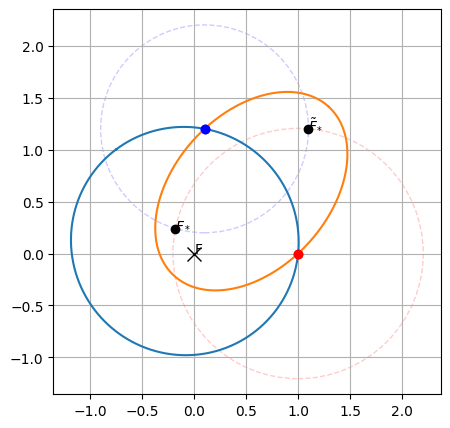

In [10]:
r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt = lambert_geometrico(P1,P2,a_s,plot=True)

In [11]:
def foo():
  es = (r2 - r1)/c
  ps = r1 - es*(P2 - P1)@P1/c
  a_s = ps/(1 - es**2)
%timeit foo()

8.53 µs ± 2.74 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Tiempo de vuelo

In [12]:
am

0.9260398644698074

In [13]:
a = 2

Argumento del periapsis de los focos vacantes: 21.44472864251333 -134.46679523568127
Excentricidades de las elipses encontradas: 0.511717080711325 0.903593850220655
Semilatus recti de las elipses encontradas: 1.4762912586165586 0.36703630768682505


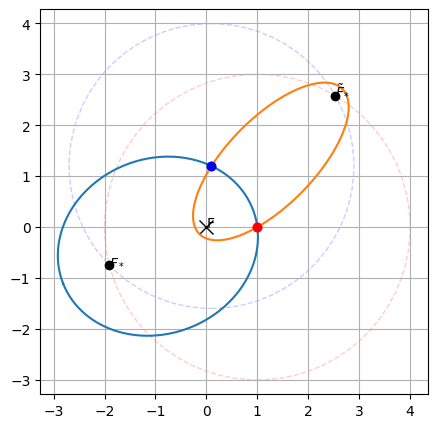

In [14]:
r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt = lambert_geometrico(P1,P2,a,plot=True)

In [15]:
# Cálculo de la menos excéntrica
Eo2 = np.arccos((1 - r2/a)/es)
Eo2*radianes

38.95702909997522

In [16]:
E2 = Eo2

In [17]:
Eo1 = np.arccos((1 - r1/a)/es)
Eo1*radianes

12.284700587132201

In [18]:
eyp = np.cross([0,0,1],ehats)
sgny = np.dot(P1,eyp)
sgny

-0.3656035130512577

In [19]:
E1 = 2*np.pi - Eo1
E1

6.068776834312449

In [20]:
mu = 1
n = np.sqrt(mu/a**3)
P = 2*np.pi/n
P

17.771531752633464

In [21]:
E1, E2

(6.068776834312449, 0.6799284245898108)

In [22]:
tf = (E2 - E1 - es*(np.sin(E2) - np.sin(E1)))/n
tf

-16.459923715577645

In [23]:
tf%P

1.3116080370558194

In [36]:
def tiempo_vuelo(a,P1,P2,mu=1):
  r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt = lambert_geometrico(P1,P2,a,plot=False)

  n = np.sqrt(mu/a**3)
  P = 2*np.pi/n

  # Órbita de menor excentridad
  eyp = np.cross([0,0,1],ehats)
  Eo2 = np.arccos((1 - r2/a)/es)
  E2 = Eo2 if np.dot(P2,eyp)>0 else 2*np.pi - Eo2
  Eo1 = np.arccos((1 - r1/a)/es)
  E1 = Eo1 if np.dot(P1,eyp)>0 else 2*np.pi - Eo1
  tf = (E2 - E1 - es*(np.sin(E2) - np.sin(E1)))/n
  tfs1 = tf%P
  tfs2 = P - tfs1

  # Órbita de mayor excentridad
  eyp = np.cross([0,0,1],ehatt)
  Eo2 = np.arccos((1 - r2/a)/et)
  E2 = Eo2 if np.dot(P2,eyp)>0 else 2*np.pi - Eo2
  Eo1 = np.arccos((1 - r1/a)/et)
  E1 = Eo1 if np.dot(P1,eyp)>0 else 2*np.pi - Eo1
  tf = (E2 - E1 - et*(np.sin(E2) - np.sin(E1)))/n
  tft1 = tf%P
  tft2 = P - tft1

  return tfs1, tfs2, tft1, tft2

In [37]:
tiempo_vuelo(2,P1,P2)

(1.3116080370558194,
 16.459923715577645,
 16.257499243556357,
 1.5140325090771078)

Text(0, 0.5, '$t_f$')

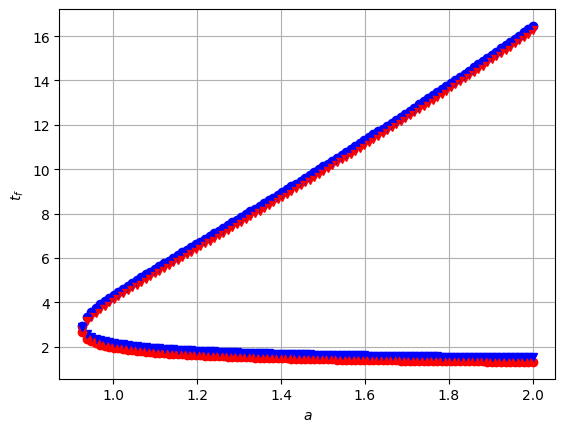

In [38]:
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
am = (r1 + r2 + c)/4

aes = np.linspace(2,1.0001*am,100)

fig = plt.figure()
ax = fig.add_subplot(111)
for a in aes:
  tfs1, tfs2, tft1, tft2 = tiempo_vuelo(a,P1,P2)
  ax.plot(a,tfs1,'ro')
  ax.plot(a,tfs2,'bo')

  ax.plot(a,tft1,'rv')
  ax.plot(a,tft2,'bv')

ax.grid()
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$t_f$')

In [57]:
tfs1, tfs2, tft1, tft2 = tiempo_vuelo(1.0001*am,P1,P2)
tfs1, tfs2, tft1, tft2

(2.6596102498427614, 2.9404091740704903, 2.730907158644492, 2.8691122652687597)

## Versión de Lambert de la Ecuación de Kepler

In [60]:
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2
a = 2

alfa = 2*np.arcsin((s/(2*a))**0.5)
beta = 2*np.arcsin(((s-c)/(2*a))**0.5)

tf = (a**(3/2)*(alfa - beta - (np.sin(alfa) - np.sin(beta))))/np.sqrt(mu)
c, s, alfa, beta, tf

(1.5,
 1.8520797289396147,
 1.4967685965013495,
 0.6024316990444019,
 1.3116080370558185)